<span style = "font-family: Arial; font-weight:bold;font-size:2.5em;color:blue;">Scale Model Cars Database Analysis (SQL)

Customers and Products Analysis Using SQL

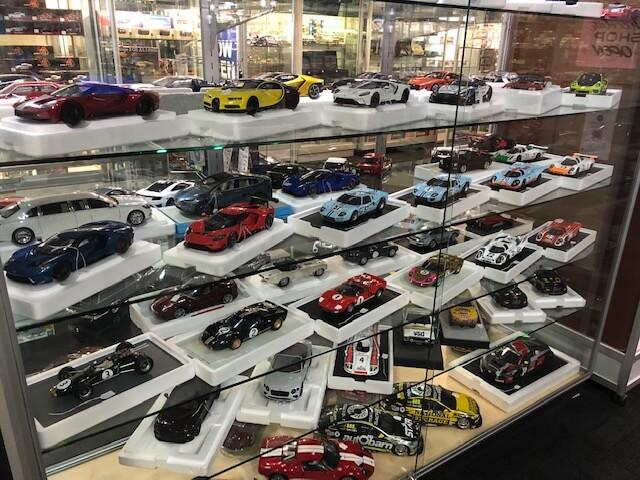

*Source*: [Diecast Secrets](https://www.carmodels.com.au/blogs/news/16248-diecast-secrets-starting-a-model-car-collection)

<span style = "font-family: Arial; font-weight:bold;font-size:2.2em;color:black;"> Introduction

The Vehicle Distributors is a fictitious global wholesale distributor specializing in die-cast vehicle models, serving a diverse customer base across more than 15 countries. Our team has been entrusted with a significant dataset analysis project, aimed at assisting the company in making strategic decisions concerning prospective expansion efforts. 

The primary goal of this undertaking is to comprehensively investigate the provided dataset and furnish well-informed responses, driven by data, to the questions posed by our client.

**Dataset**

The provided dataset, along with its corresponding schema, can be found [here](https://github.com/seandhan/Scale-Model-Cars-Database-Analysis/blob/main/stores.db).

**Database schema**

The scale model cars database contains eight tables:

1. **Customers**: customer data
2. **Employees**: all employee information
3. **Offices**: sales office information
4. **Orders**: customers' sales orders
5. **OrderDetails**: sales order line for each sales order
6. **Payments**: customers' payment records
7. **Products**: a list of scale model cars
8. **ProductLines**: a list of product line categories


The scale model cars database schema is as follows.

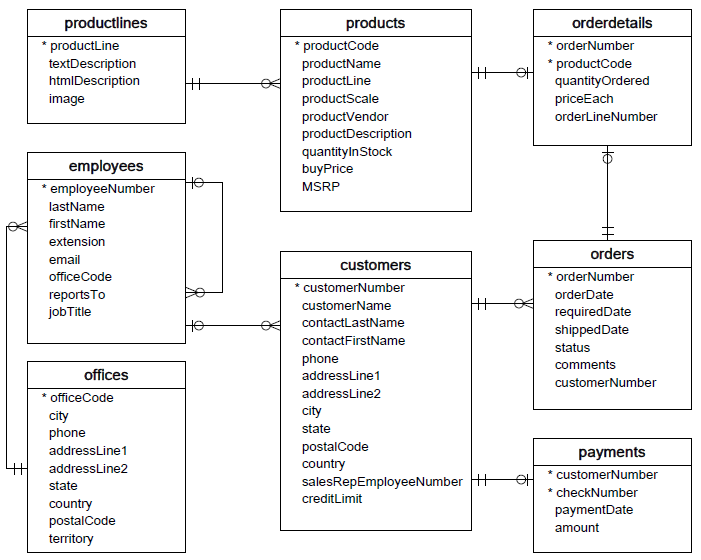

---

<span style = "font-family: Arial; font-weight:bold;font-size:2.2em;color:black;"> Objectives

The primary objective of this project is to conduct an in-depth analysis of data from a sales records database, with the intent of extracting meaningful insights that can be employed to enhance decision-making processes. The power of data analysis in the realm of sales is well-established, as it enables the derivation of essential Key Performance Indicators (KPIs), thereby fostering more informed and streamlined decision-making practices.

---

# Exploratory Data Analysis

In [1]:
# Importing Libraries
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Database connection

In [3]:
%%capture
%load_ext sql
%sql sqlite:///stores.db

---

# Exploring database

**List of tables**

In [4]:
%%sql
SELECT name FROM sqlite_master WHERE type='table';

 * sqlite:///stores.db
Done.


name
customers
employees
offices
orderdetails
orders
payments
productlines
products


**Overall Table Summary**

In [5]:
%%capture

# Execute the query to list the names of tables
table_query = "SELECT name FROM sqlite_master WHERE type='table';"
table_names = %sql $table_query

# Create an empty DataFrame to store the table summaries
table_summaries = []

# Iterate through the table names
for table_name in table_names:
    table_name = table_name[0]

    # Execute queries to get the number of attributes and rows per table
    attributes_query = f"PRAGMA table_info({table_name});"
    row_count_query = f"SELECT COUNT(*) FROM {table_name};"

    # Get the results
    attributes = %sql $attributes_query
    row_count = %sql $row_count_query

    # Add the table summary to the list
    table_summaries.append((table_name, len(attributes), row_count[0][0]))

# Create a DataFrame from the list of table summaries
table_summary_df = pd.DataFrame(table_summaries, columns=[
    'Table Name', 'Number of Attributes', 'Number of Rows'])

In [6]:
# Display the DataFrame
display(table_summary_df)

,Table Name,Number of Attributes,Number of Rows
0,customers,13,122
1,employees,8,23
2,offices,9,7
3,orderdetails,5,2996
4,orders,7,326
5,payments,4,273
6,productlines,4,7
7,products,9,110


---

**Tables Missing Values Summary**

In [7]:
%%capture

# Create an empty DataFrame to store the results
results = []

# Execute the query to list the names of tables
table_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = %sql $table_query

# Iterate through the tables
for table in tables:
    table_name = table[0]

    # Execute a query to retrieve the names of attributes (columns) in the table
    attributes_query = f"PRAGMA table_info({table_name});"
    attributes_info = %sql $attributes_query

    # Check each attribute for missing values
    for attribute_info in attributes_info:
        attribute_name = attribute_info[1]
        notnull_query = f"SELECT COUNT(*) FROM {table_name} WHERE {attribute_name} IS NULL;"
        missing_count = %sql $notnull_query

        if missing_count[0][0] > 0:
            results.append((table_name, attribute_name, missing_count[0][0]))

# Create a DataFrame from the results
missing_values_df = pd.DataFrame(
    results, columns=['Table Name', 'Attribute Name', 'Missing Values'])

In [8]:
# Display the DataFrame
display(missing_values_df)

,Table Name,Attribute Name,Missing Values
0,customers,addressLine2,100
1,customers,state,73
2,customers,postalCode,7
3,customers,salesRepEmployeeNumber,22
4,employees,reportsTo,1
5,offices,addressLine2,2
6,offices,state,3
7,orders,shippedDate,14
8,orders,comments,246
9,productlines,htmlDescription,7


---

## `customers` table

**View the first 5 rows**

In [9]:
%%sql
SELECT *
  FROM customers LIMIT 5;

 * sqlite:///stores.db
Done.


customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370,21000
112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166,71800
114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611,117300
119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370,118200
121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504,81700


**View the data types**

In [10]:
%%sql
PRAGMA table_info(customers);

 * sqlite:///stores.db
Done.


cid,name,type,notnull,dflt_value,pk
0,customerNumber,INTEGER,1,None,1
1,customerName,nvarchar(50),1,None,0
2,contactLastName,nvarchar(50),1,None,0
3,contactFirstName,nvarchar(50),1,None,0
4,phone,nvarchar(50),1,None,0
5,addressLine1,nvarchar(50),1,None,0
6,addressLine2,nvarchar(50),0,NULL,0
7,city,nvarchar(50),1,None,0
8,state,nvarchar(50),0,NULL,0
9,postalCode,nvarchar(15),0,NULL,0


**Lets get the top 10 customer count by country**

In [11]:
%%sql
SELECT 
    country,
    COUNT(customerNumber) as customer_count,
    ROUND(COUNT(country) * 100.0 / SUM(COUNT(country)) OVER(), 1) AS 'percentage_%'
  FROM customers
 GROUP BY country

ORDER BY customer_count DESC
LIMIT 10;

 * sqlite:///stores.db
Done.


country,customer_count,percentage_%
USA,36,29.5
Germany,13,10.7
France,12,9.8
Spain,7,5.7
Australia,5,4.1
UK,5,4.1
Italy,4,3.3
New Zealand,4,3.3
Canada,3,2.5
Finland,3,2.5


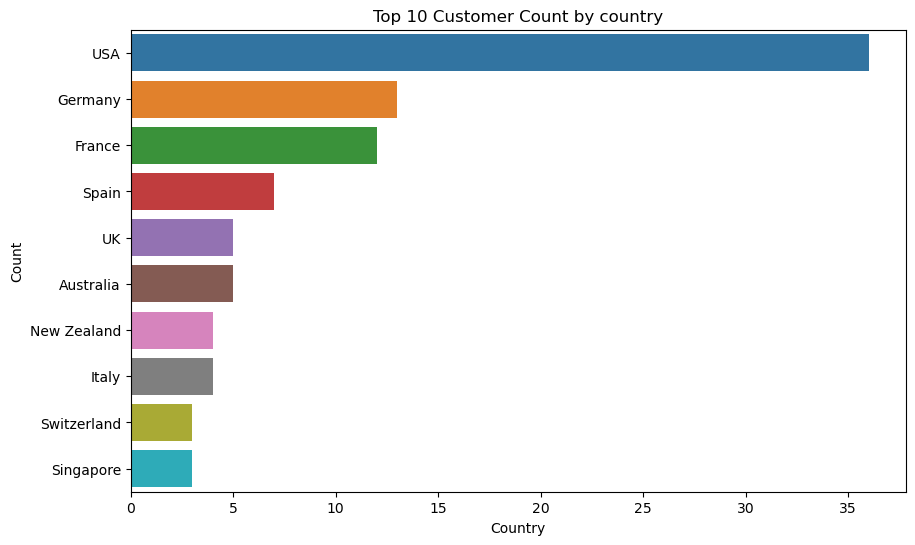

In [12]:
# Connect to the SQLite database
connection = sqlite3.connect('stores.db')  # Replace with your database file name

# Define the table name and categorical attribute to analyze
table_name = 'customers'  # Replace with your table name
categorical_attribute = 'country'  # Replace with the attribute name

# Retrieve the data from the database
query = f"""
SELECT {categorical_attribute}, 
COUNT(*) as count FROM {table_name} GROUP BY {categorical_attribute} ORDER BY count DESC LIMIT 10;
"""
data = pd.read_sql_query(query, connection)

# Create the barplot using seaborn
plt.figure(figsize=(10, 6))
# sns.set(style="whitegrid")
sns.barplot(y=categorical_attribute, x="count", data=data)
plt.title(f"Top 10 Customer Count by {categorical_attribute}")
plt.xlabel("Country")
plt.ylabel("Count")
# plt.xticks(rotation=45)
plt.show()

----

## `employees` table

**View the first 5 rows**

In [13]:
%%sql
SELECT *
  FROM employees LIMIT 5;

 * sqlite:///stores.db
Done.


employeeNumber,lastName,firstName,extension,email,officeCode,reportsTo,jobTitle
1002,Murphy,Diane,x5800,dmurphy@classicmodelcars.com,1,None,President
1056,Patterson,Mary,x4611,mpatterso@classicmodelcars.com,1,1002,VP Sales
1076,Firrelli,Jeff,x9273,jfirrelli@classicmodelcars.com,1,1002,VP Marketing
1088,Patterson,William,x4871,wpatterson@classicmodelcars.com,6,1056,Sales Manager (APAC)
1102,Bondur,Gerard,x5408,gbondur@classicmodelcars.com,4,1056,Sale Manager (EMEA)


**View the data types**

In [14]:
%%sql
PRAGMA table_info(employees);

 * sqlite:///stores.db
Done.


cid,name,type,notnull,dflt_value,pk
0,employeeNumber,INTEGER,1,None,1
1,lastName,nvarchar(50),1,None,0
2,firstName,nvarchar(50),1,None,0
3,extension,nvarchar(10),1,None,0
4,email,nvarchar(100),1,None,0
5,officeCode,nvarchar(10),1,None,0
6,reportsTo,INTEGER,0,NULL,0
7,jobTitle,nvarchar(50),1,None,0


**Employee to Manager**

In [15]:
%%sql
SELECT
    e.employeeNumber,
    e.firstName || ' ' || e.lastName AS employeeName,
    e.jobTitle,
    m.firstName || ' ' || m.lastName AS managerName,
    ROW_NUMBER() OVER (PARTITION BY e.reportsTo ORDER BY e.employeeNumber) AS level
FROM employees e
LEFT JOIN employees m ON e.reportsTo = m.employeeNumber;

 * sqlite:///stores.db
Done.


employeeNumber,employeeName,jobTitle,managerName,level
1002,Diane Murphy,President,None,1
1056,Mary Patterson,VP Sales,Diane Murphy,1
1076,Jeff Firrelli,VP Marketing,Diane Murphy,2
1088,William Patterson,Sales Manager (APAC),Mary Patterson,1
1102,Gerard Bondur,Sale Manager (EMEA),Mary Patterson,2
1143,Anthony Bow,Sales Manager (NA),Mary Patterson,3
1621,Mami Nishi,Sales Rep,Mary Patterson,4
1611,Andy Fixter,Sales Rep,William Patterson,1
1612,Peter Marsh,Sales Rep,William Patterson,2
1619,Tom King,Sales Rep,William Patterson,3


**organizational_structure**

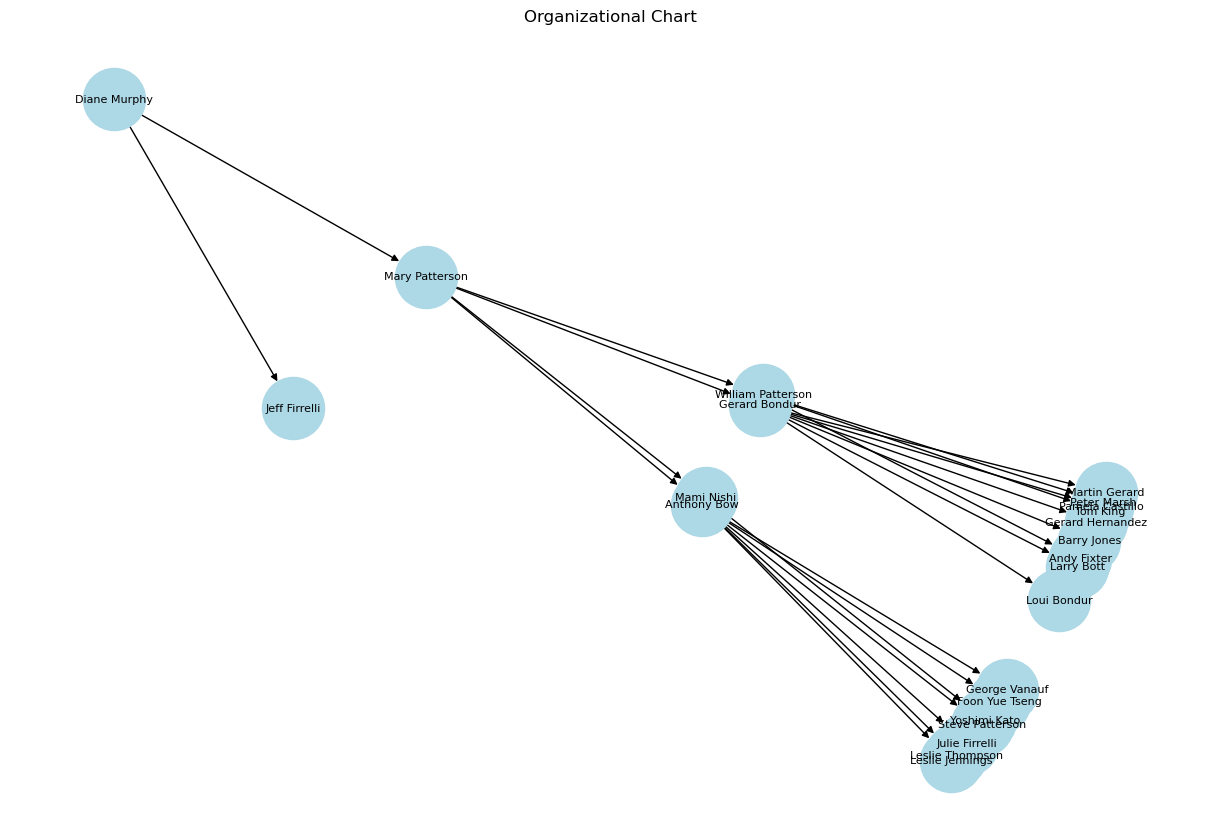

In [16]:
query = """
SELECT
    e.employeeNumber,
    e.firstName || ' ' || e.lastName AS employeeName,
    e.jobTitle,
    m.firstName || ' ' || m.lastName AS managerName,
    ROW_NUMBER() OVER (PARTITION BY e.reportsTo ORDER BY e.employeeNumber) AS level
FROM employees e
LEFT JOIN employees m ON e.reportsTo = m.employeeNumber;

"""

data = pd.read_sql_query(query, connection)

org_data = data[['employeeName','managerName']]

import networkx as nx
# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add nodes to the graph
for _, row in org_data.iterrows():
    G.add_node(row['employeeName'])
    if not pd.isna(row['managerName']):
        G.add_edge(row['managerName'], row['employeeName'])

# Define node positions using Kamada-Kawai layout with adjusted scale and center
pos = nx.kamada_kawai_layout(G, scale=10, center=(0, 0))

# Mirror the layout horizontally (invert x-coordinates)
for node, (x, y) in pos.items():
    pos[node] = (-x, y)

# Create the organizational chart using Matplotlib
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=8, font_color='black', node_shape='o')
plt.title("Organizational Chart")
plt.axis('off')

# Display the chart
plt.show()

----

## `offices` table

**View the first 5 rows**

In [17]:
%%sql
SELECT *
  FROM offices;

 * sqlite:///stores.db
Done.


officeCode,city,phone,addressLine1,addressLine2,state,country,postalCode,territory
1,San Francisco,+1 650 219 4782,100 Market Street,Suite 300,CA,USA,94080,NA
2,Boston,+1 215 837 0825,1550 Court Place,Suite 102,MA,USA,02107,NA
3,NYC,+1 212 555 3000,523 East 53rd Street,apt. 5A,NY,USA,10022,NA
4,Paris,+33 14 723 4404,43 Rue Jouffroy D'abbans,None,None,France,75017,EMEA
5,Tokyo,+81 33 224 5000,4-1 Kioicho,None,Chiyoda-Ku,Japan,102-8578,Japan
6,Sydney,+61 2 9264 2451,5-11 Wentworth Avenue,Floor #2,None,Australia,NSW 2010,APAC
7,London,+44 20 7877 2041,25 Old Broad Street,Level 7,None,UK,EC2N 1HN,EMEA


**View the data types**

In [18]:
%%sql
PRAGMA table_info(offices);

 * sqlite:///stores.db
Done.


cid,name,type,notnull,dflt_value,pk
0,officeCode,nvarchar(10),1,None,1
1,city,nvarchar(50),1,None,0
2,phone,nvarchar(50),1,None,0
3,addressLine1,nvarchar(50),1,None,0
4,addressLine2,nvarchar(50),0,NULL,0
5,state,nvarchar(50),0,NULL,0
6,country,nvarchar(50),1,None,0
7,postalCode,nvarchar(15),1,None,0
8,territory,nvarchar(10),1,None,0


**Lets get the top 10 office count by country**

In [19]:
%%sql
SELECT 
    country,
    COUNT(officeCode) as office_count,
    ROUND(COUNT(country) * 100.0 / SUM(COUNT(country)) OVER(), 1) AS 'percentage_%'
  FROM offices
 GROUP BY country

ORDER BY office_count DESC
LIMIT 10;

 * sqlite:///stores.db
Done.


country,office_count,percentage_%
USA,3,42.9
Australia,1,14.3
France,1,14.3
Japan,1,14.3
UK,1,14.3


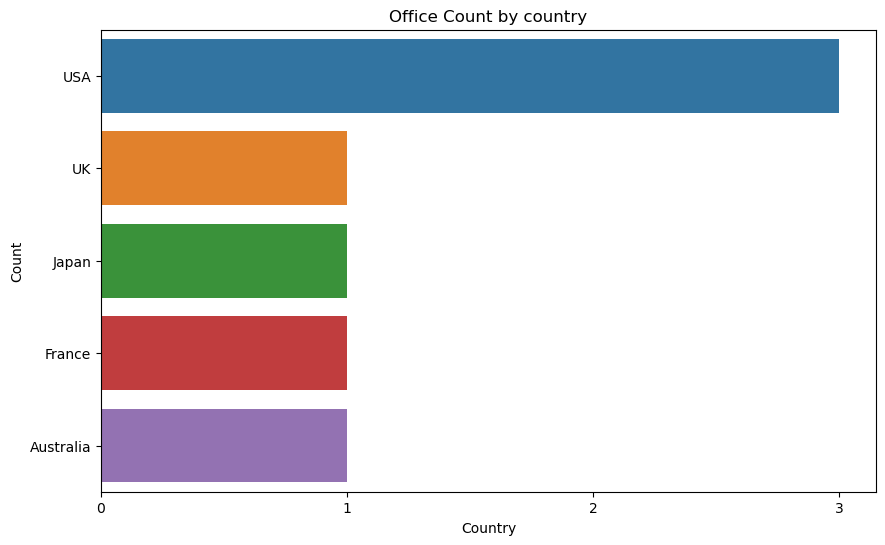

In [20]:
# Connect to the SQLite database
connection = sqlite3.connect('stores.db')  # Replace with your database file name

# Define the table name and categorical attribute to analyze
table_name = 'offices'  # Replace with your table name
categorical_attribute = 'country'  # Replace with the attribute name

# Retrieve the data from the database
query = f"""
SELECT {categorical_attribute}, 
COUNT(*) as count FROM {table_name} GROUP BY {categorical_attribute} ORDER BY count DESC;
"""
data = pd.read_sql_query(query, connection)

# Create the barplot using seaborn
plt.figure(figsize=(10, 6))
# sns.set(style="whitegrid")
sns.barplot(y=categorical_attribute, x="count", data=data)
plt.title(f"Office Count by {categorical_attribute}")
plt.xlabel("Country")
plt.xticks(range(4))
plt.ylabel("Count")
# plt.xticks(rotation=45)
plt.show()

----

## `orderdetails` table

**View the first 5 rows**

In [21]:
%%sql
SELECT *
  FROM orderdetails LIMIT 10;

 * sqlite:///stores.db
Done.


orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber
10100,S18_1749,30,136,3
10100,S18_2248,50,55.09,2
10100,S18_4409,22,75.46,4
10100,S24_3969,49,35.29,1
10101,S18_2325,25,108.06,4
10101,S18_2795,26,167.06,1
10101,S24_1937,45,32.53,3
10101,S24_2022,46,44.35,2
10102,S18_1342,39,95.55,2
10102,S18_1367,41,43.13,1


**View the data types**

In [22]:
%%sql
PRAGMA table_info(orderdetails);

 * sqlite:///stores.db
Done.


cid,name,type,notnull,dflt_value,pk
0,orderNumber,INTEGER,1,None,1
1,productCode,nvarchar(15),1,None,2
2,quantityOrdered,INTEGER,1,None,0
3,priceEach,"numeric(10,2)",1,None,0
4,orderLineNumber,smallint(6),1,None,0


---

## `orders` table

**View the first 5 rows**

In [23]:
%%sql
SELECT *
  FROM orders LIMIT 5;

 * sqlite:///stores.db
Done.


orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363
10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128
10102,2003-01-10,2003-01-18,2003-01-14,Shipped,None,181
10103,2003-01-29,2003-02-07,2003-02-02,Shipped,None,121
10104,2003-01-31,2003-02-09,2003-02-01,Shipped,None,141


**View the data types**

In [24]:
%%sql
PRAGMA table_info(orders);

 * sqlite:///stores.db
Done.


cid,name,type,notnull,dflt_value,pk
0,orderNumber,INTEGER,1,None,1
1,orderDate,date,1,None,0
2,requiredDate,date,1,None,0
3,shippedDate,date,0,NULL,0
4,status,nvarchar(15),1,None,0
5,comments,TEXT,0,None,0
6,customerNumber,INTEGER,1,None,0


**Check the states for _status_ category**

In [25]:
%%sql
SELECT 
    status,
    COUNT(status) "count"
FROM orders
GROUP BY status
ORDER BY status DESC;

 * sqlite:///stores.db
Done.


status,count
Shipped,303
Resolved,4
On Hold,4
In Process,6
Disputed,3
Cancelled,6


**Check the total order count per year**

In [26]:
%%sql
SELECT strftime('%Y', shippedDate) AS year, COUNT(*) AS order_count
FROM orders
WHERE status = 'Shipped'
GROUP BY year
ORDER BY year;

 * sqlite:///stores.db
Done.


year,order_count
2003,108
2004,145
2005,50


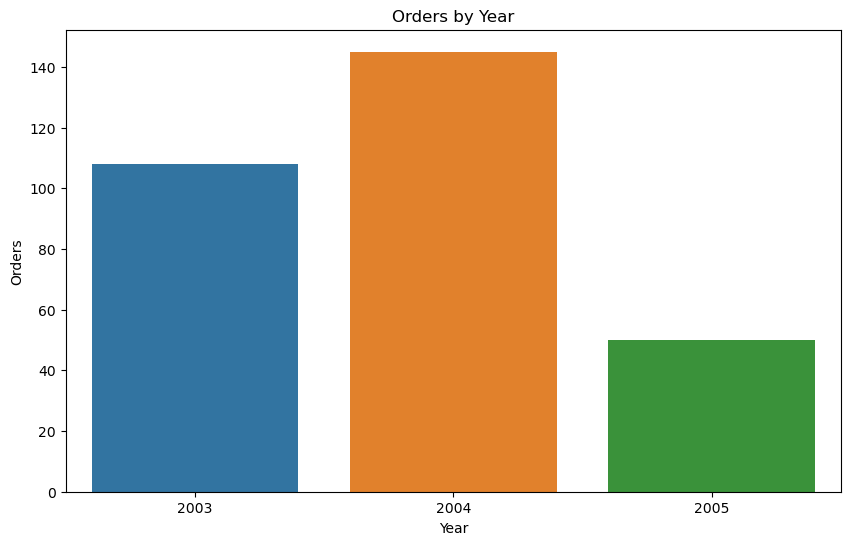

In [27]:
# Retrieve the data from the database
query = f"""
SELECT strftime('%Y', shippedDate) AS year, COUNT(*) AS order_count
FROM orders
WHERE status = 'Shipped'
GROUP BY year
ORDER BY year;
"""
data = pd.read_sql_query(query, connection)

# Create the barplot using seaborn
plt.figure(figsize=(10, 6))
# sns.set(style="whitegrid")
sns.barplot(y="order_count", x="year", data=data)
plt.title(f"Orders by Year")
plt.xlabel("Year")
plt.ylabel("Orders")
plt.show()

In [28]:
%%sql
SELECT
    strftime('%Y', shippedDate) AS year,
    CASE
        WHEN strftime('%m', shippedDate) BETWEEN '01' AND '03' THEN 'Q1'
        WHEN strftime('%m', shippedDate) BETWEEN '04' AND '06' THEN 'Q2'
        WHEN strftime('%m', shippedDate) BETWEEN '07' AND '09' THEN 'Q3'
        ELSE 'Q4'
    END AS quarter,
    COUNT(*) AS order_count
FROM orders
WHERE status = 'Shipped'
GROUP BY year, quarter
ORDER BY year, quarter;

 * sqlite:///stores.db
Done.


year,quarter,order_count
2003,Q1,14
2003,Q2,19
2003,Q3,19
2003,Q4,56
2004,Q1,25
2004,Q2,26
2004,Q3,35
2004,Q4,59
2005,Q1,34
2005,Q2,16


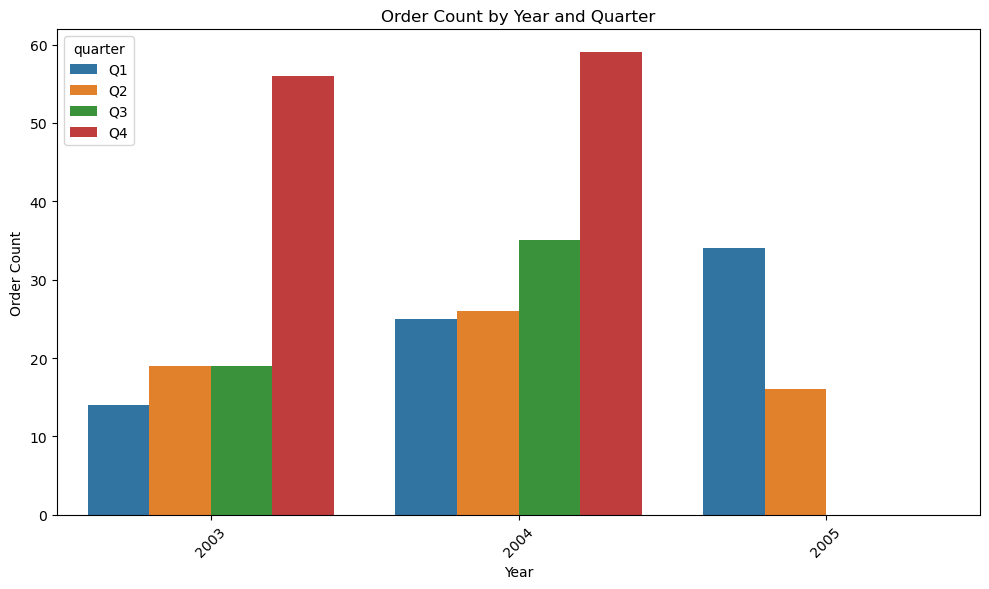

In [29]:
# SQL query to extract the number of shipped orders by year
query = """
SELECT
    strftime('%Y', shippedDate) AS year,
    CASE
        WHEN strftime('%m', shippedDate) BETWEEN '01' AND '03' THEN 'Q1'
        WHEN strftime('%m', shippedDate) BETWEEN '04' AND '06' THEN 'Q2'
        WHEN strftime('%m', shippedDate) BETWEEN '07' AND '09' THEN 'Q3'
        ELSE 'Q4'
    END AS quarter,
    COUNT(*) AS order_count
FROM orders
WHERE status = 'Shipped'
GROUP BY year, quarter
ORDER BY year, quarter;
"""

# Execute the query and fetch the data
data = pd.read_sql_query(query, connection)


# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="year", y="order_count", hue="quarter")
plt.xlabel("Year")
plt.ylabel("Order Count")
plt.title("Order Count by Year and Quarter")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

---

## `payments` table

**View the first 5 rows**

In [30]:
%%sql
SELECT *
  FROM payments LIMIT 5;

 * sqlite:///stores.db
Done.


customerNumber,checkNumber,paymentDate,amount
103,HQ336336,2004-10-19,6066.78
103,JM555205,2003-06-05,14571.44
103,OM314933,2004-12-18,1676.14
112,BO864823,2004-12-17,14191.12
112,HQ55022,2003-06-06,32641.98


**View the data types**

In [31]:
%%sql
PRAGMA table_info(payments);

 * sqlite:///stores.db
Done.


cid,name,type,notnull,dflt_value,pk
0,customerNumber,INTEGER,1,None,1
1,checkNumber,nvarchar(50),1,None,2
2,paymentDate,date,1,None,0
3,amount,"numeric(10,2)",1,None,0


**Top 10 payments by customerNumer**

In [32]:
%%sql
SELECT 
    customerNumber,
    ROUND(SUM(amount),2) AS total_payment
 FROM payments
GROUP BY customerNumber
ORDER BY total_payment DESC
LIMIT 10;

 * sqlite:///stores.db
Done.


customerNumber,total_payment
141,715738.98
124,584188.24
114,180585.07
151,177913.95
148,156251.03
323,154622.08
187,148410.09
276,137034.22
321,132340.78
146,130305.35


**Payments by Year and Quarter**

In [33]:
%%sql
SELECT 
    strftime('%Y', paymentDate) AS year,
    CASE
        WHEN strftime('%m', paymentDate) BETWEEN '01' AND '03' THEN 'Q1'
        WHEN strftime('%m', paymentDate) BETWEEN '04' AND '06' THEN 'Q2'
        WHEN strftime('%m', paymentDate) BETWEEN '07' AND '09' THEN 'Q3'
        ELSE 'Q4'
    END AS quarter,
    ROUND(SUM(amount),2) AS total_payments_rec
 FROM payments
GROUP BY year, quarter
ORDER BY year, quarter;

 * sqlite:///stores.db
Done.


year,quarter,total_payments_rec
2003,Q1,370356.46
2003,Q2,476414.87
2003,Q3,565658.09
2003,Q4,1837788.28
2004,Q1,745407.35
2004,Q2,567613.24
2004,Q3,1138731.31
2004,Q4,1861576.35
2005,Q1,775057.37
2005,Q2,515235.91


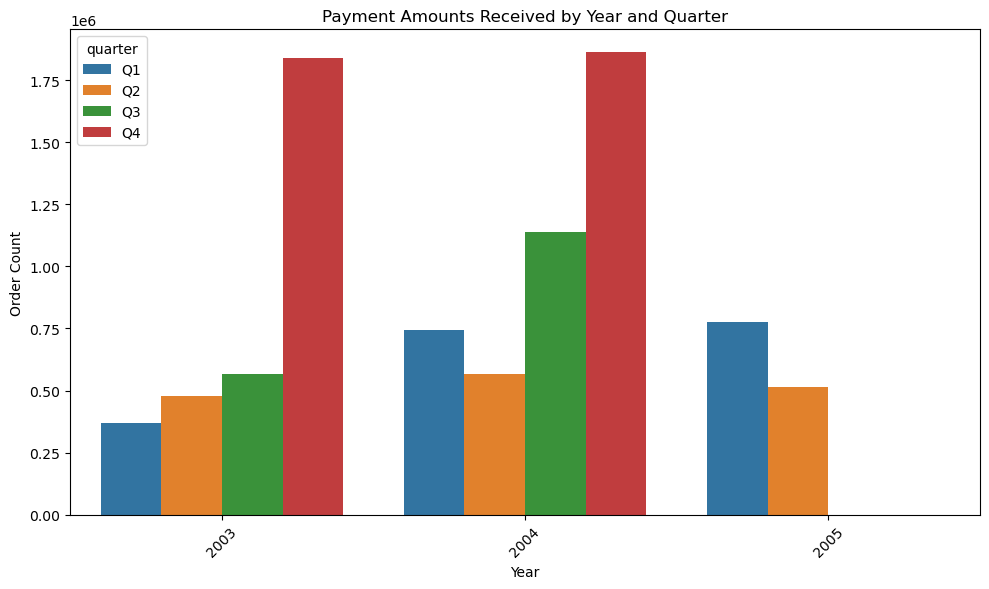

In [34]:
# SQL query to extract the sum payment amounts by year and quarter
query = """
SELECT 
    strftime('%Y', paymentDate) AS year,
    CASE
        WHEN strftime('%m', paymentDate) BETWEEN '01' AND '03' THEN 'Q1'
        WHEN strftime('%m', paymentDate) BETWEEN '04' AND '06' THEN 'Q2'
        WHEN strftime('%m', paymentDate) BETWEEN '07' AND '09' THEN 'Q3'
        ELSE 'Q4'
    END AS quarter,
    ROUND(SUM(amount),2) AS total_payments_rec
 FROM payments
GROUP BY year, quarter
ORDER BY year, quarter;
"""

# Execute the query and fetch the data
data = pd.read_sql_query(query, connection)


# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="year", y="total_payments_rec", hue="quarter")
plt.xlabel("Year")
plt.ylabel("Order Count")
plt.title("Payment Amounts Received by Year and Quarter")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

----

## `productlines` table

**View the first 5 rows**

In [35]:
%%sql
SELECT *
  FROM productlines LIMIT 5;

 * sqlite:///stores.db
Done.


productLine,textDescription,htmlDescription,image
Classic Cars,"Attention car enthusiasts: Make your wildest car ownership dreams come true. Whether you are looking for classic muscle cars, dream sports cars or movie-inspired miniatures, you will find great choices in this category. These replicas feature superb attention to detail and craftsmanship and offer features such as working steering system, opening forward compartment, opening rear trunk with removable spare wheel, 4-wheel independent spring suspension, and so on. The models range in size from 1:10 to 1:24 scale and include numerous limited edition and several out-of-production vehicles. All models include a certificate of authenticity from their manufacturers and come fully assembled and ready for display in the home or office.",None,None
Motorcycles,"Our motorcycles are state of the art replicas of classic as well as contemporary motorcycle legends such as Harley Davidson, Ducati and Vespa. Models contain stunning details such as official logos, rotating wheels, working kickstand, front suspension, gear-shift lever, footbrake lever, and drive chain. Materials used include diecast and plastic. The models range in size from 1:10 to 1:50 scale and include numerous limited edition and several out-of-production vehicles. All models come fully assembled and ready for display in the home or office. Most include a certificate of authenticity.",None,None
Planes,"Unique, diecast airplane and helicopter replicas suitable for collections, as well as home, office or classroom decorations. Models contain stunning details such as official logos and insignias, rotating jet engines and propellers, retractable wheels, and so on. Most come fully assembled and with a certificate of authenticity from their manufacturers.",None,None
Ships,"The perfect holiday or anniversary gift for executives, clients, friends, and family. These handcrafted model ships are unique, stunning works of art that will be treasured for generations! They come fully assembled and ready for display in the home or office. We guarantee the highest quality, and best value.",None,None
Trains,"Model trains are a rewarding hobby for enthusiasts of all ages. Whether you're looking for collectible wooden trains, electric streetcars or locomotives, you'll find a number of great choices for any budget within this category. The interactive aspect of trains makes toy trains perfect for young children. The wooden train sets are ideal for children under the age of 5.",None,None


**View the data types**

In [36]:
%%sql
PRAGMA table_info(productlines);

 * sqlite:///stores.db
Done.


cid,name,type,notnull,dflt_value,pk
0,productLine,nvarchar(50),1,None,1
1,textDescription,nvarchar(4000),0,NULL,0
2,htmlDescription,mediumtext,0,None,0
3,image,mediumblob,0,None,0


In [37]:
%%sql
SELECT DISTINCT productLine
  FROM productlines

 * sqlite:///stores.db
Done.


productLine
Classic Cars
Motorcycles
Planes
Ships
Trains
Trucks and Buses
Vintage Cars


---

## `products` table

**View the first 5 rows**

In [38]:
%%sql
SELECT *
  FROM products LIMIT 5;

 * sqlite:///stores.db
Done.


productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front suspension, gear-shift lever, footbrake lever, drive chain, wheels and steering. All parts are particularly delicate due to their precise scale and require special care and attention.",7933,48.81,95.7
S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.,7305,98.58,214.3
S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddle bags located on side of motorcycle, detailed engine, working steering, working suspension, two leather seats, luggage rack, dual exhaust pipes, small saddle bag located on handle bars, two-tone paint with chrome accents, superior die-cast detail , rotating wheels , working kick stand, diecast metal with plastic parts and baked enamel finish.",6625,68.99,118.94
S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos and insignias, detachable rear wheelie bar, heavy diecast metal with resin parts, authentic multi-color tampo-printed graphics, separate engine drive belts, free-turning front fork, rotating tires and rear racing slick, certificate of authenticity, detailed engine, display stand\r\n, precision diecast replica, baked enamel finish, 1:10 scale model, removable fender, seat and tank cover piece for displaying the superior detail of the v-twin engine",5582,91.02,193.66
S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.,3252,85.68,136


**View the data types**

In [39]:
%%sql
PRAGMA table_info(products);

 * sqlite:///stores.db
Done.


cid,name,type,notnull,dflt_value,pk
0,productCode,nvarchar(15),1,None,1
1,productName,nvarchar(70),1,None,0
2,productLine,nvarchar(50),1,None,0
3,productScale,nvarchar(10),1,None,0
4,productVendor,nvarchar(50),1,None,0
5,productDescription,TEXT,1,None,0
6,quantityInStock,smallint(6),1,None,0
7,buyPrice,"numeric(10,2)",1,None,0
8,MSRP,"numeric(10,2)",1,None,0


In [40]:
%%sql
SELECT 
    productLine,
    COUNT(*) AS count
FROM products
GROUP BY productLine
ORDER BY count DESC

 * sqlite:///stores.db
Done.


productLine,count
Classic Cars,38
Vintage Cars,24
Motorcycles,13
Planes,12
Trucks and Buses,11
Ships,9
Trains,3


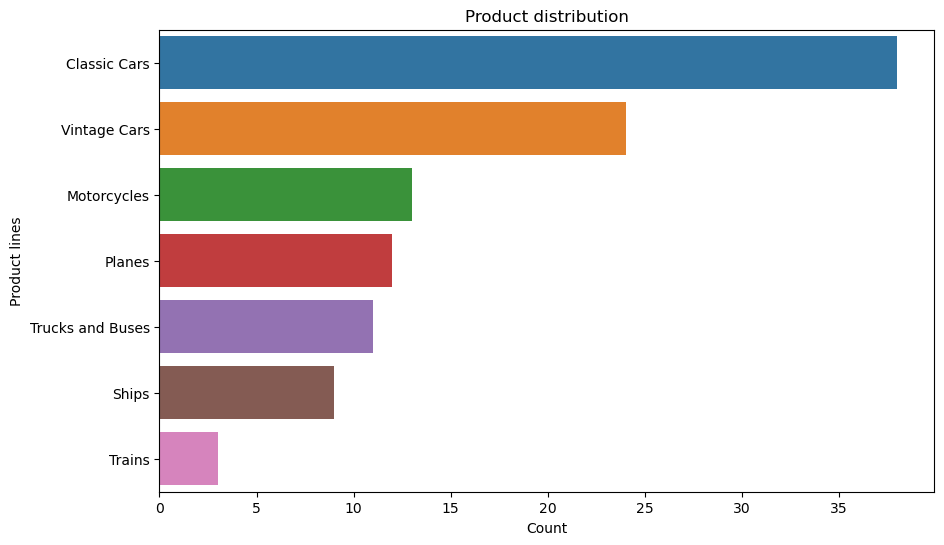

In [41]:
# Retrieve the data from the database
query = f"""
SELECT 
    productLine,
    COUNT(*) AS count
FROM products
GROUP BY productLine
ORDER BY count DESC
"""
data = pd.read_sql_query(query, connection)

# Create the barplot using seaborn
plt.figure(figsize=(10, 6))
# sns.set(style="whitegrid")
sns.barplot(y="productLine", x="count", data=data)
plt.title(f"Product distribution")
plt.xlabel("Count")
plt.ylabel("Product lines")
# plt.xticks(rotation=45)
plt.show()

---

<a id="Question_9"></a>